# Prosper Loan Data Exploration
## by (Alaa Elhariry)

## Preliminary Wrangling

> This dataset contains data about Prosper, a credit company that facilitates peer-to-peer lending. There are 113,937 loans in total, with 81 different variables. I've used the following factors to conduct my investigation: Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, and Investors are some of the terms used by Prosper.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Set the grid for the output coulmns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Adjust the style of the output tables in the notebook to have an outlined edges

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

Let's get started by loading the dataset and doing some preliminary wrangling:

In [4]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')

In [5]:
# Explore the dataframe size
loan_df.shape

(113937, 81)

In [6]:
# Check data types of the dataset fields
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
# Explore the first few rows
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [8]:
# check for duplicates in the dataset
sum(loan_df.duplicated())

0

In [9]:
# Checking for number and percentage of Nulls

# Getting the number of missing values in each column
num_missing = loan_df.isna().sum()

# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]

# Getting the percentages of missing values and round down the result 
percent_missing = num_missing * 100 / loan_df.shape[0]
percent_missing = percent_missing.round(2) 

# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it 
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
GroupKey,100596,88.29
LoanFirstDefaultedCycleNumber,96985,85.12
ScorexChangeAtTimeOfListing,95009,83.39
ProsperPrincipalOutstanding,91852,80.62
ProsperPrincipalBorrowed,91852,80.62
ProsperPaymentsOneMonthPlusLate,91852,80.62
ProsperPaymentsLessThanOneMonthLate,91852,80.62
OnTimeProsperPayments,91852,80.62
TotalProsperPaymentsBilled,91852,80.62
TotalProsperLoans,91852,80.62


Since I'm only interested in certain features of the dataset, I'll only remove the nulls for the dataframe containing these features.

In [10]:
# extract the features of interest 
sub_data =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

# adjust the datframe
loan_subdata = loan_df[sub_data]

In [11]:
# explore a sample of the sub dataframe
loan_subdata.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
102716,60,Current,0.1870,C,1,Employed,0.0,18333.333333,NaN,5000,2013-09-26 00:00:00,0,1
13696,36,Chargedoff,0.2000,NaN,0,Not available,0.0,6833.333333,NaN,10000,2007-02-20 00:00:00,0,112
36170,36,Chargedoff,0.1975,NaN,1,Full-time,0.0,3541.666667,NaN,10000,2008-03-18 00:00:00,0,334
15945,36,Current,0.2099,C,7,Employed,0.0,4583.333333,1.0,2000,2013-08-19 00:00:00,0,1
113475,36,Current,0.2049,C,1,Employed,0.0,20833.333333,NaN,3500,2013-04-17 00:00:00,0,70


In [12]:
# Check the size of the sub data
loan_subdata.shape

(113937, 13)

In [13]:
# Let's check number of null values for the subset data 
missing_values = loan_subdata.isnull().sum()

# sort the data 
missing_values.sort_values(ascending=False)

TotalProsperLoans            91852
ProsperRating (Alpha)        29084
EmploymentStatus              2255
DelinquenciesLast7Years        990
Term                             0
LoanStatus                       0
BorrowerRate                     0
ListingCategory (numeric)        0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
Investors                        0
dtype: int64

Since Prosper uses their own proprietary rating system, we have a few missing values in their "ProsperRating", so we need to drop these missing values:

In [14]:
# dropping the Nulls from 'ProsperRating (Alpha)'
loan_subdata = loan_subdata.dropna(subset=['ProsperRating (Alpha)']).reset_index()

Convert `LoanOriginationDate` to datetime datatype:

In [15]:
# Changing the data type of 'LoanOriginationDate' to datetime
loan_subdata['LoanOriginationDate'] = pd.to_datetime(loan_subdata['LoanOriginationDate'])

In [16]:
# Let's check if there are any nulls left
loan_subdata.isnull().sum().sort_values(ascending=False)

TotalProsperLoans            65056
index                            0
Term                             0
LoanStatus                       0
BorrowerRate                     0
ProsperRating (Alpha)            0
ListingCategory (numeric)        0
EmploymentStatus                 0
DelinquenciesLast7Years          0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
Investors                        0
dtype: int64

According to [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) The value for column `TotalProsperLoans` will be NaN if there is no past credit history on Prosper; let's replace it with 0:

In [17]:
# Replace 'TotalProsperLoans' Nulls with 0
loan_subdata['TotalProsperLoans'] = loan_subdata['TotalProsperLoans'].fillna(0)

In [18]:
# confirm that there's no Nulls left for the sub dataset
loan_subdata.isna().values.sum()

0

### Descriptive Statistics

Before going through the analysis, I will check the statistics for the numerical and categorical features of the subset dataframe.

- #### Statistics for the Numerical varibles:

In [19]:
# Get the summary statiscircs for the numeric values 
# exluding 'count' here, as we aleardy know the total count for each varible

loan_subdata.describe().transpose()\
    .drop("index", axis=0)

,count,mean,std,min,25%,50%,75%,max
Term,84853.0,42.486135,11.640346,12.00,36.0000,36.0000,60.000000,6.000000e+01
BorrowerRate,84853.0,0.196022,0.074631,0.04,0.1359,0.1875,0.257400,3.600000e-01
ListingCategory (numeric),84853.0,3.312647,4.364277,0.00,1.0000,1.0000,3.000000,2.000000e+01
DelinquenciesLast7Years,84853.0,3.659435,9.347957,0.00,0.0000,0.0000,2.000000,9.900000e+01
StatedMonthlyIncome,84853.0,5931.174803,8239.943740,0.00,3434.0000,5000.0000,7083.333333,1.750003e+06
TotalProsperLoans,84853.0,0.340789,0.726235,0.00,0.0000,0.0000,0.000000,8.000000e+00
LoanOriginalAmount,84853.0,9083.440515,6287.860058,1000.00,4000.0000,7500.0000,13500.000000,3.500000e+04
Recommendations,84853.0,0.017560,0.187963,0.00,0.0000,0.0000,0.000000,1.900000e+01
Investors,84853.0,68.264669,95.195831,1.00,1.0000,32.0000,97.000000,1.189000e+03


- #### Statistics for the categorical variables

We'll use the describe function to choose the non-numerical columns, and we'll use `np.object` to select the non-numerical columns.

In [20]:
# Get the summary statiscircs for the non-numeric columns
# exluding 'count' here, as we aleardy know the total count for each varible

loan_subdata.describe(include=[np.object]).transpose() \
    .drop("count", axis=1)

,unique,top,freq
LoanStatus,11,Current,56576
ProsperRating (Alpha),7,C,18345
EmploymentStatus,7,Employed,67310


### What is the structure of your dataset?

>After cleansing, there are 84853 (down from 113937) loan listings on Prosper, a peer-to-peer credit company. **`LoanStatus`, `BorrowerRate`, `ProsperRating (Alpha)`, `ListingCategory (numeric)`, `EmploymentStatus`, `DelinquenciesLast7Years`, `StatedMonthlyIncome`, `TotalProsperLoans`, `LoanOriginalAmount`, `LoanOriginationDate`, `Recommendations`, `Investors`** are the variables. The majority of the variables are numeric, however there are a few that are not (categorical):

- LoanStatus - categorical variable
- ProsperRating (Aplha) ordinal categorical variable with the following values from higher to lower ('AA', 'A', 'B', 'C', 'D', 'E', 'HR')
- EmploymentStatus - categorical variable
- ListingCategory (numeric) - a numeric code for category of credit (will explored in detail below).
- LoanOriginationDate - datetime object

### What is/are the main feature(s) of interest in your dataset?

>I would like to know what features are used to predict a default on credit. Also i would like to check what are the major factors that are connected with prosper credit rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I expect that The Prosper rating will have the biggest impact on the chances of a loan default. It will depend on the borrower's income and employment status.

## Univariate Exploration

In [21]:
# setting color
default_color = sb.color_palette()[4]

Let's look at the `Term` variable using a Count Plot first:

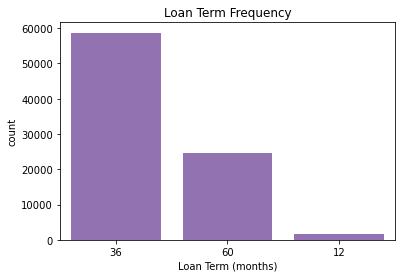

In [22]:
# Visulizing the time periods for loans
type_order = loan_subdata['Term'].value_counts().index
sb.countplot(data = loan_subdata, x = 'Term', color = default_color, order=type_order);
plt.xlabel('Loan Term (months)');
plt.title('Loan Term Frequency');

There are three possibilities for `Term`: the loan durations: 36, 60, and 12 months. The 36-month loan period is the most common in the dataset. Let's look into `LoanStatus` next:

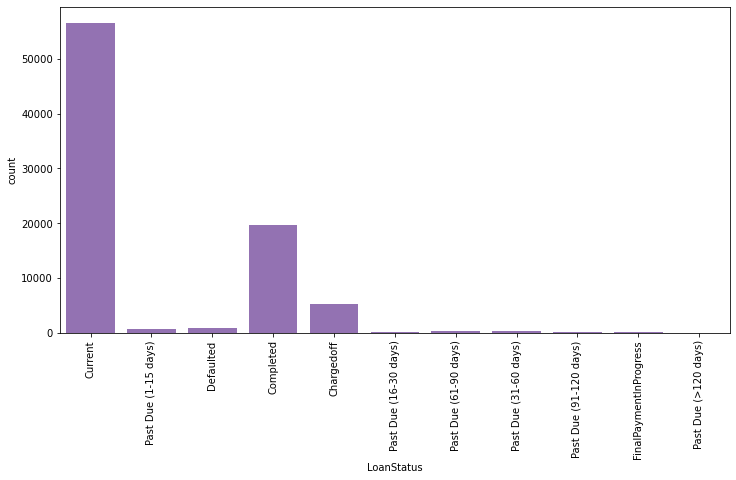

In [23]:
plt.figure(figsize=[12, 6])
plt.xticks(rotation=90)
sb.countplot(data = loan_subdata, x = 'LoanStatus', color = default_color);

Most of the loans in the dataset are actually **Current** loans. Following it with a big frequency the **Completed** loans, followed by  **Chargedoff**, while **Defaulted** and **Past due** categories loans represent a minority. 
Up next - `BorrowerRate`:

In [24]:
# Check the frequency of the top 2 peaks
loan_subdata.BorrowerRate.value_counts().nlargest(2)

0.3177    3672
0.3199    1645
Name: BorrowerRate, dtype: int64

Turns out that two most common rates are 0.3177 and 0.3199. Let's check `ProsperRating (Alpha)` next:

Because `ProsperRating (Alpha)` is ordinal categorial variable (From the highest rating A to the lowest HR) We need to convert it using pandas:

In [25]:
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']


ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_list)
loan_subdata['ProsperRating (Alpha)'] = loan_subdata['ProsperRating (Alpha)'].astype(ordered_var)

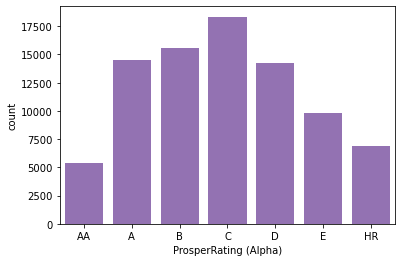

In [26]:
sb.countplot(data=loan_subdata, x='ProsperRating (Alpha)', color=default_color);

Surprisingly, ratings are relatively evenly divided, with the highest AA and lowest HR ratings being the least prevalent and the average rating C being the most common. Let's have a look at the purpose of the loan using `ListingCategory (numeric)`:

Debt consolidation is the most common usage of borrowing. Other, Auto, Home Improvement, and Business are also prominent categories. `EmploymentStatus` is the next variable:

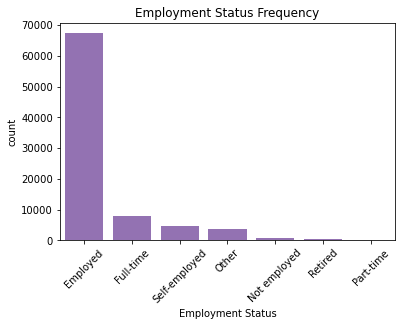

In [27]:
# Plot the Employment Status 
type_order = loan_subdata['EmploymentStatus'].value_counts().index
sb.countplot(data=loan_subdata, x='EmploymentStatus', color=default_color,order=type_order)
plt.xticks(rotation=45);
plt.xlabel('Employment Status');
plt.title('Employment Status Frequency');

The majority of borrowers are **Employed**, with the remaining categories accounting for only a minor percentage of the total. Let's look at the variable `DelinquenciesLast7Years`:

In [28]:
# If a data point is far from the mean by more than 3 standard deviations it will be considered an outlier
income_std = loan_subdata['StatedMonthlyIncome'].std()
income_mean = loan_subdata['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(loan_subdata[loan_subdata['StatedMonthlyIncome'] >= boundary])

245

Let's take a close look at the `StatedMonthlyIncome`:

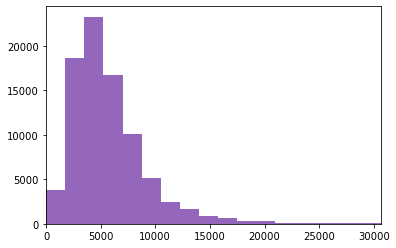

In [29]:
# This time limit x scale by boundary
plt.hist(data=loan_subdata, x='StatedMonthlyIncome', bins=1000, color=default_color);
plt.xlim(0, boundary);

With a boundary of mean + three standard deviations, the distribution of the monthly income still has noticeable right skew but now we can see that mode is about 5,000. Next step – `TotalProsperLoans`:

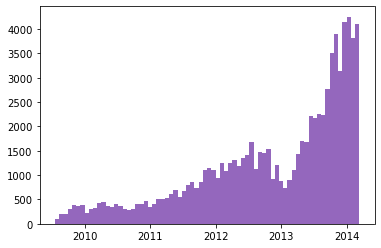

In [30]:
plt.hist(data=loan_subdata, x='LoanOriginationDate', bins=72, color=default_color);

In [31]:
loan_subdata['LoanOriginationDate'].describe()

count                   84853
unique                   1165
top       2014-01-22 00:00:00
freq                      491
first     2009-07-20 00:00:00
last      2014-03-12 00:00:00
Name: LoanOriginationDate, dtype: object

The data ranges from **2009-07-20** to **2014-02-21**. Since the beginning of 2013, there has been a significant increase in the number of loans. The following item is "Recommendations":

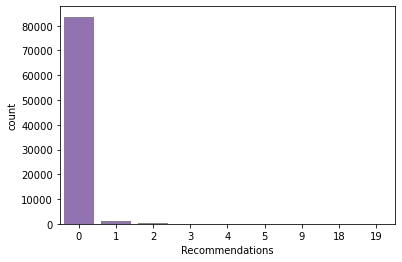

In [32]:
sb.countplot(data=loan_subdata, x='Recommendations', color=default_color);

The great majority of loans were secured without the need for recommendations. Let's look at `Investors` next:

The majority of loans have only one investor, and the majority have less than 200, although some have as many as 1200.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The distribution of Prosper ratings is roughly normally distributed. Because this is obviously based on borrowers' self-reporting, there are a lot of outliers and a wide range of numbers, I believe there are a lot of erroneous values, therefore we'll wrestle with it below. I didn't think any scale transformations would be useful in this situation. The majority of loans are under $15,000, and it appears that the majority of loans are in 5,000-dollar increments.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>The vast majority of loans are current ones. We are not interested in any current loans (or loans with a specified past due time), and chargedoff loans can be regarded defaulted because our major purpose is to define driving elements of loan outcome. In the next stage, we'll make some changes to the data:

In [33]:
# Check the number of each value in the 'LoanStatus'
loan_subdata['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [34]:
# leaving only completed chargedoff or defaulted listings
condition = (loan_subdata['LoanStatus'] == 'Completed') | (loan_subdata['LoanStatus'] == 'Defaulted') | (loan_subdata['LoanStatus'] == 'Chargedoff')
loan_subdata = loan_subdata[condition]

In [35]:
# setting chargedoff as defaulted
def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']

In [36]:
loan_subdata['LoanStatus'] = loan_subdata.apply(change_to_defaulted, axis=1)

In [37]:
#Check the values counts again
loan_subdata['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

We have 19664 completed loans and 6341 defaulted loans after transforming the dataset.

Because `ListingCategory (numeric)` is set up as numeric and most of the values have a very low frequency, we'll modify it to categorical and reduce the number of categories for easier visualisation:

In [38]:
# helper function:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categories(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]

In [39]:
loan_subdata['ListingCategory (numeric)'] = loan_subdata.apply(reduce_categories, axis=1)

In [40]:
loan_subdata['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

We also need to eliminate the outliers from `StatedMonthlyIncome`; we may assume that this is a self-reporting parameter and that the outliers are merely borrowers' errors, with monthly income being misunderstood for yearly income most likely.

In [41]:
# eliminate the outliers
loan_subdata = loan_subdata[loan_subdata['StatedMonthlyIncome'] < boundary]

## Bivariate Exploration

Let's start with the pair-wise correlation between all numeric variables:

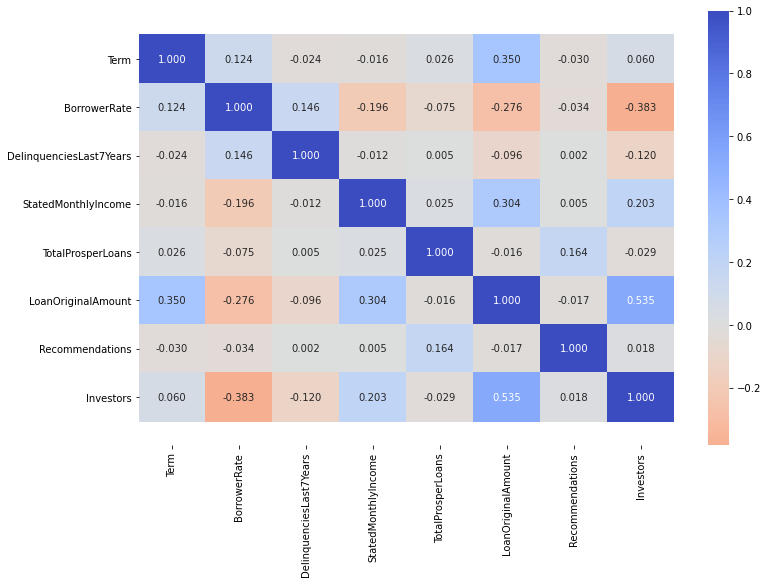

In [42]:
# extract the numerical varibles
numeric_vars = ['Term', 'BorrowerRate', 'DelinquenciesLast7Years', 'StatedMonthlyIncome',
                'TotalProsperLoans', 'LoanOriginalAmount', 'Recommendations', 'Investors'
               ]
# settings of the heatmap
plt.figure(figsize = [12, 8])
ax = sb.heatmap(loan_subdata[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'coolwarm_r', center = 0)

# adjust the cutted edges of the heatmap
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

- Surprisingly, in this dataset, there is no strong correlation between variables.


- There is some moderate positive correlation between `LoanOriginalAmount` and `Term`, `LoanOriginalAmount` and number of 
`Investors`, `LoanOriginalAmount` and `StatedMonthlyIncome`, `Recommendations` and `TotalProsperLoans`, number of delinquencies and borrowers rate. 


- There is also a moderate negative correlation between the loan amount and the borrower rate, as well as the number of investors and the borrower rate. 


Let's look at the categorical features:

<Figure size 720x720 with 0 Axes>

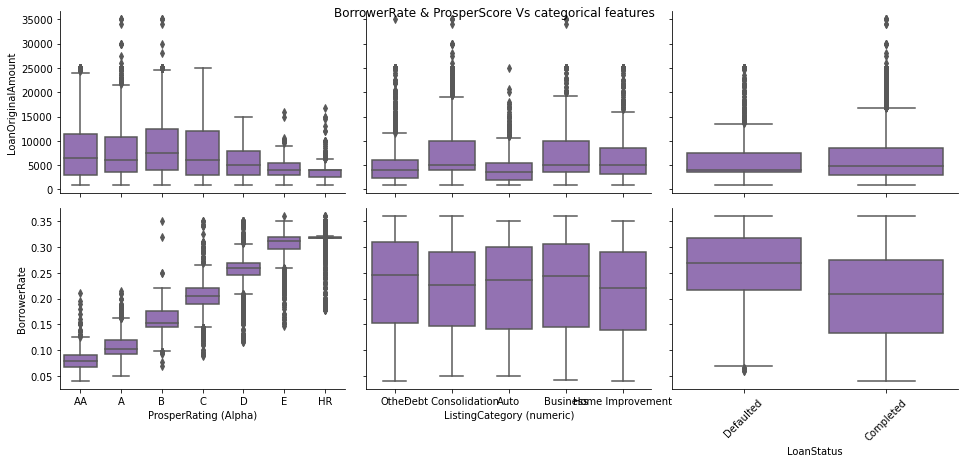

In [43]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerRate']
categoric_vars = ['ProsperRating (Alpha)', 'ListingCategory (numeric)', 'LoanStatus']


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_subdata, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)

g.map(boxgrid);
plt.xticks(rotation=45);
g.fig.suptitle('BorrowerRate & ProsperScore Vs categorical features');
plt.show();

Borrowers with a poor credit rating are given a smaller loan amount and a higher interest rate. The amount borrowed for 'other' and 'auto' purposes is usually less than for other categories, and the interest rate does not vary considerably between them. Defaulted loans are often smaller than Completed loans. The defaulted loan borrower rate is significantly greater than the completed loan borrower rate, although this is due to consumers with weaker credit ratings paying higher interest rates.



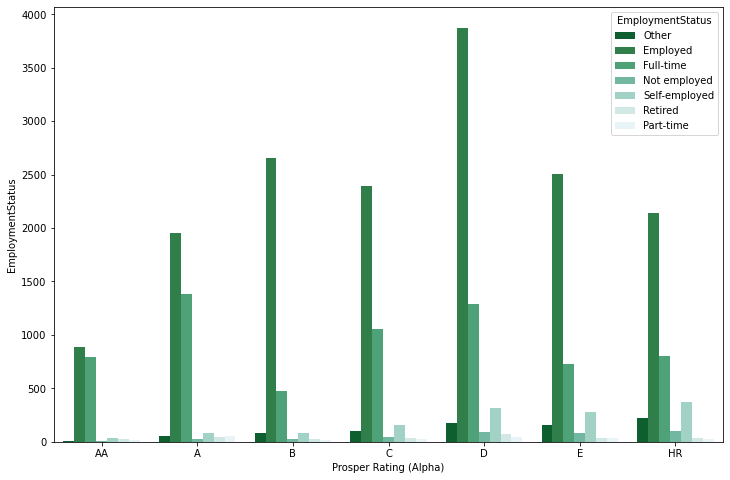

In [50]:
plt.figure(figsize = [12, 8])
sb.countplot(data = loan_subdata, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette='BuGn_r');
plt.xlabel("Prosper Rating (Alpha)");
plt.ylabel("EmploymentStatus");

Individuals with employment statuses of Not Employed, Self-employed, Retired, and Part-Time appear to be more prevalent in lower ratings. Let's look at the total number of delinquencies and the rating.

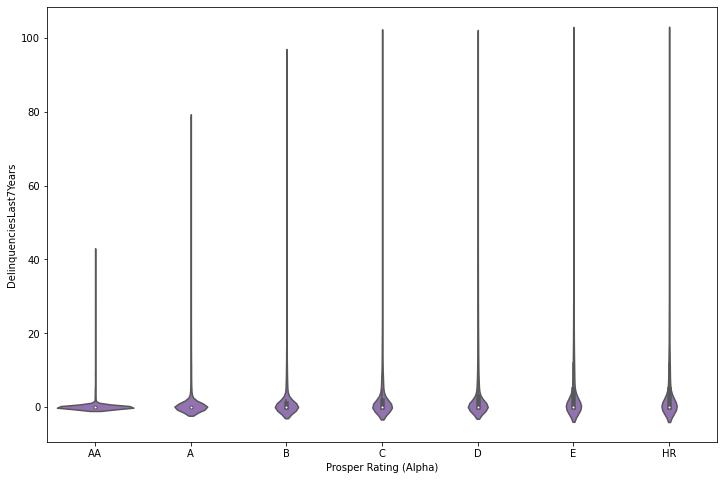

In [51]:
plt.figure(figsize = [12, 8])
sb.violinplot(data = loan_subdata, x = 'ProsperRating (Alpha)', y = 'DelinquenciesLast7Years', color = default_color);
plt.xlabel("Prosper Rating (Alpha)");
plt.ylabel("DelinquenciesLast7Years");

Indivuduals with highest AA rating tend to have less delinquencies than others.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>Individuals with poorer credit ratings are more likely to receive default credits, as expected. The categories of business and home improvement appear to be more risky. For defaulted credits, the borrower rate is usually higher. Credits with a 60-month maturity are riskier than those with a shorter maturity (12 months). Individuals with a bad credit rating have a higher rate of borrowing. A better rating is associated with a larger monthly revenue. Individuals with lower ratings are more likely to be unemployed, self-employed, retired, or working part-time.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>One notable observation I've made is that the prosper rating D is the most common among defaulted credits.

## Multivariate Exploration

Let's have a closer look on relationship between Term, Rate, Delinquencies, Monthly Income, Loan Amount and Loan Status.

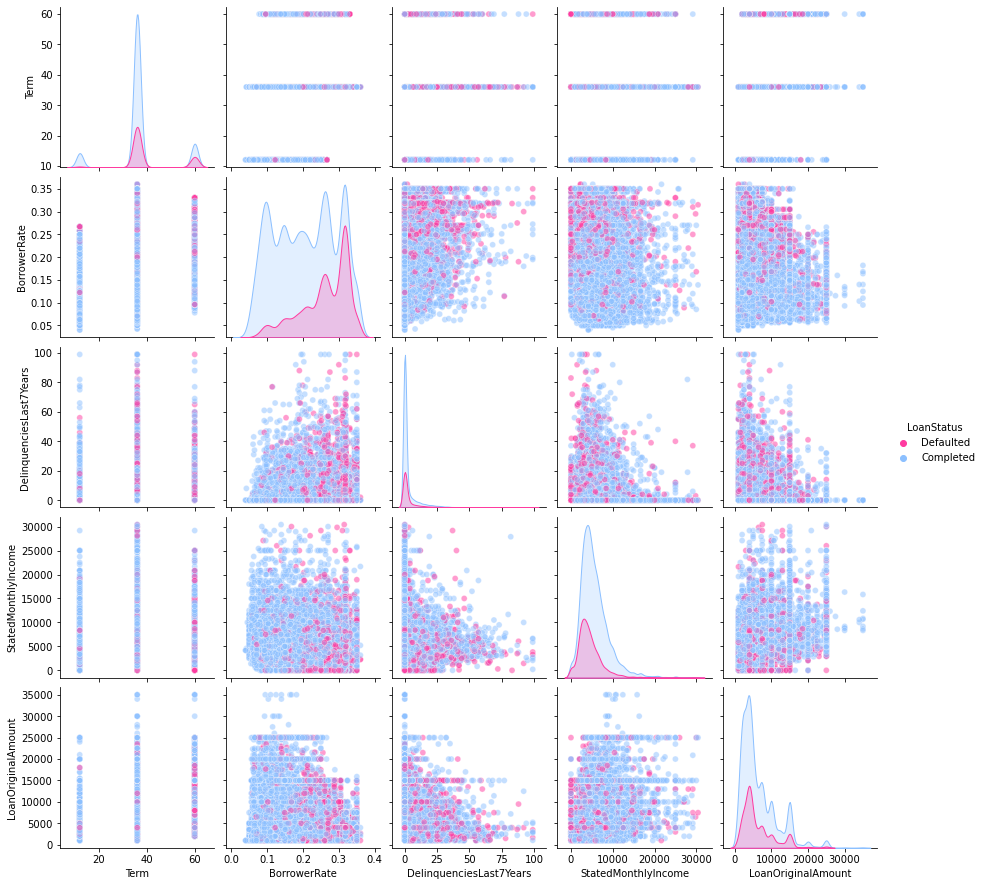

In [52]:
# extract and visualize the features of interest
cols = [
    'Term', 'BorrowerRate', 'DelinquenciesLast7Years', 'StatedMonthlyIncome',
    'LoanOriginalAmount', 'LoanStatus'
       ]
g = sb.pairplot(loan_subdata[cols], hue='LoanStatus',
                palette={'Defaulted': '#ff3ba0', 'Completed': '#8cc0ff'},
                plot_kws={'alpha': 0.5, 'edgecolor': 'white'})
fig = g.fig;

Number of Delinquencies for the last 7 years and Borrower Rate appear to be the best predictors of credit outcome, however as we saw in the previous section, both are derivatives of credit rating.

Let's look at categorical variables next, starting with the correlations between rating, loan amount, and loan status:

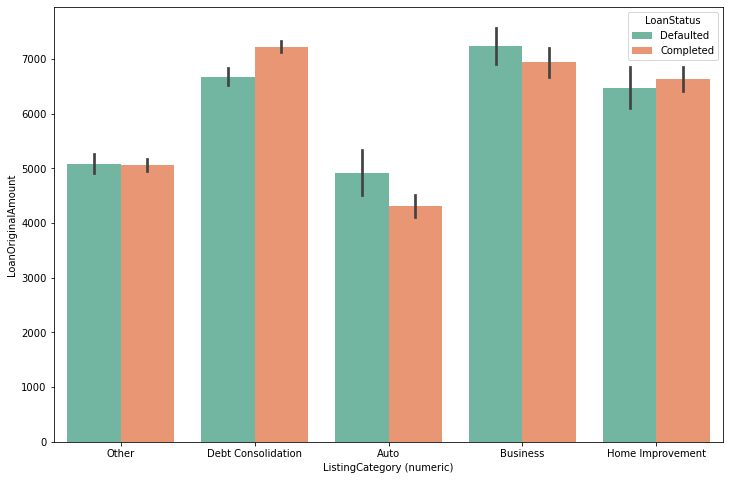

In [53]:
plt.figure(figsize = [12, 8])
sb.barplot(data=loan_subdata, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus', palette="Set2");

As we previously discovered, the Auto and Business categories are more prone to defaulting, and we can now see that the Business category has a bigger number. Let's take a closer look at the connections between credit category, credit rating, and credit outcome.

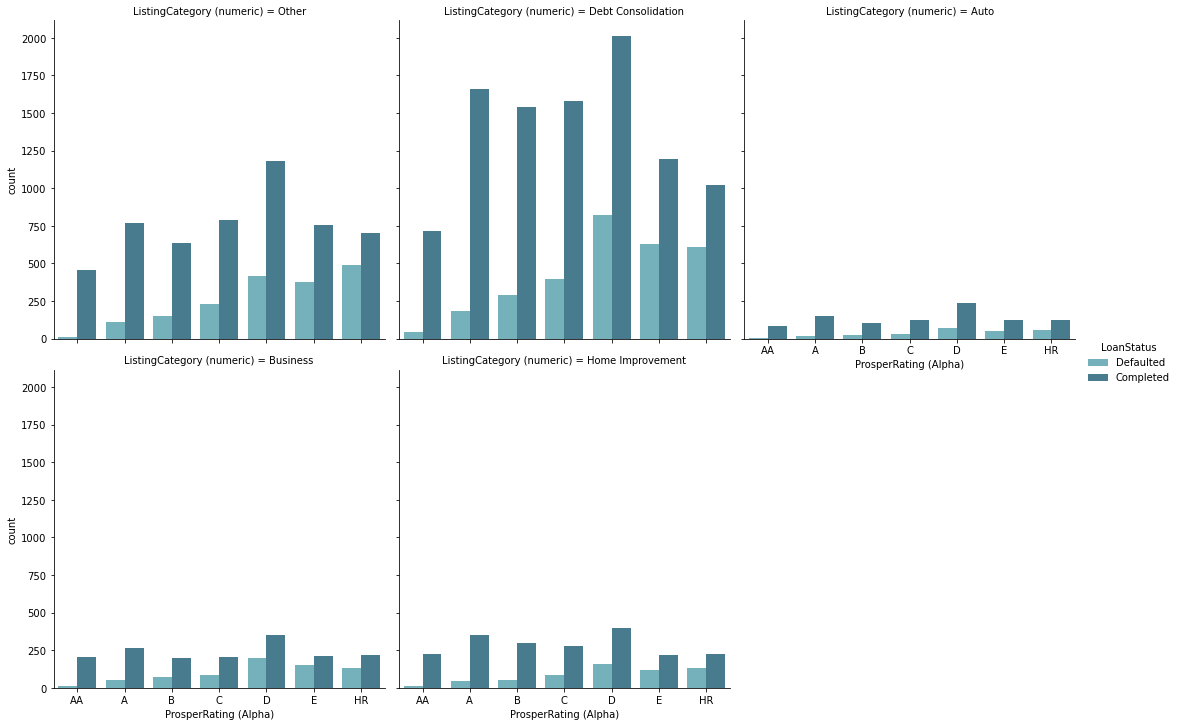

In [54]:
sb.catplot(x='ProsperRating (Alpha)', hue='LoanStatus', col='ListingCategory (numeric)',
              data=loan_subdata, kind='count', palette='GnBu_d', col_wrap=3
             );

There does not appear to be a significant difference in default rates across different categories when broken down by ratings. Let's look at the relationship between the term, the category, and the result: